In [1]:
#importing required libraries
import pandas as pd 
import datetime
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,auc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn import metrics


In [2]:
#Loading the Dataset
df = pd.read_csv("Temp_change.csv",encoding='latin-1')
#Cleaning
df.dropna()
print(df.head())
df = df.rename(columns = {"Area":"Country"})
df = df.drop(columns = ['Area Code',"Months Code","Element Code",'Unit'])

   Area Code         Area  Months Code    Months  Element Code  \
0          2  Afghanistan         7001   January          7271   
1          2  Afghanistan         7001   January          6078   
2          2  Afghanistan         7002  February          7271   
3          2  Afghanistan         7002  February          6078   
4          2  Afghanistan         7003     March          7271   

              Element Unit  Y1961  Y1962  Y1963  ...  Y2010  Y2011  Y2012  \
0  Temperature change   °C  0.777  0.062  2.744  ...  3.601  1.179 -0.583   
1  Standard Deviation   °C  1.950  1.950  1.950  ...  1.950  1.950  1.950   
2  Temperature change   °C -1.743  2.465  3.919  ...  1.212  0.321 -3.201   
3  Standard Deviation   °C  2.597  2.597  2.597  ...  2.597  2.597  2.597   
4  Temperature change   °C  0.516  1.336  0.403  ...  3.390  0.748 -0.527   

   Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
0  1.233  1.755  1.943  3.416  1.201  1.996  2.951  
1  1.950  1.950  1.950  1.950  1.9

In [3]:
temperature_change = df.loc[df.Months.isin(['January',"February","March","April","May","June","July","August",'September','October',"November","December"])]

temperature_change = temperature_change.melt(id_vars=['Country','Months','Element'],var_name = 'Year',value_name ='temperature_change')
temperature_change['Year']= temperature_change['Year'].str[1:].astype('str')


In [4]:
gb = df.groupby("Country")

#Antarctica as a case study
Antarctica_df = gb.get_group("Antarctica")
Antarctica_df.replace(0,np.NaN).dropna(axis=1)


,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
238,Antarctica,January,Temperature change,-1.807,-1.597,-0.733,0.009,-0.651,-1.431,2.291,...,2.022,1.525,-0.224,1.402,0.942,-0.914,-1.637,0.488,0.757,-0.509
239,Antarctica,January,Standard Deviation,1.240,1.240,1.240,1.240,1.240,1.240,1.240,...,1.240,1.240,1.240,1.240,1.240,1.240,1.240,1.240,1.240,1.240
240,Antarctica,February,Temperature change,-0.471,-1.047,-1.160,-0.965,0.538,-0.100,0.270,...,1.980,1.937,0.011,-1.871,-1.865,-0.679,-1.066,0.959,0.046,2.535
241,Antarctica,February,Standard Deviation,1.084,1.084,1.084,1.084,1.084,1.084,1.084,...,1.084,1.084,1.084,1.084,1.084,1.084,1.084,1.084,1.084,1.084
242,Antarctica,March,Temperature change,-2.035,0.128,-0.666,0.649,1.217,2.049,-0.186,...,2.779,-0.917,1.480,1.626,-2.003,0.423,-0.341,1.931,1.858,1.966
243,Antarctica,March,Standard Deviation,1.156,1.156,1.156,1.156,1.156,1.156,1.156,...,1.156,1.156,1.156,1.156,1.156,1.156,1.156,1.156,1.156,1.156
244,Antarctica,April,Temperature change,-1.477,-1.089,-2.956,-3.232,-0.095,0.377,-0.545,...,-3.382,-0.984,-2.130,-0.099,1.215,0.571,0.817,-1.108,-0.026,0.183
245,Antarctica,April,Standard Deviation,1.868,1.868,1.868,1.868,1.868,1.868,1.868,...,1.868,1.868,1.868,1.868,1.868,1.868,1.868,1.868,1.868,1.868
246,Antarctica,May,Temperature change,0.497,-1.448,0.765,-3.206,1.126,-2.139,-0.587,...,2.507,-2.658,-0.475,-3.115,2.165,-1.133,1.219,1.268,3.549,0.086
247,Antarctica,May,Standard Deviation,1.704,1.704,1.704,1.704,1.704,1.704,1.704,...,1.704,1.704,1.704,1.704,1.704,1.704,1.704,1.704,1.704,1.704


Text(0.5, 1.0, 'Temperature change in Antarctica')

C:\Users\poosh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\poosh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


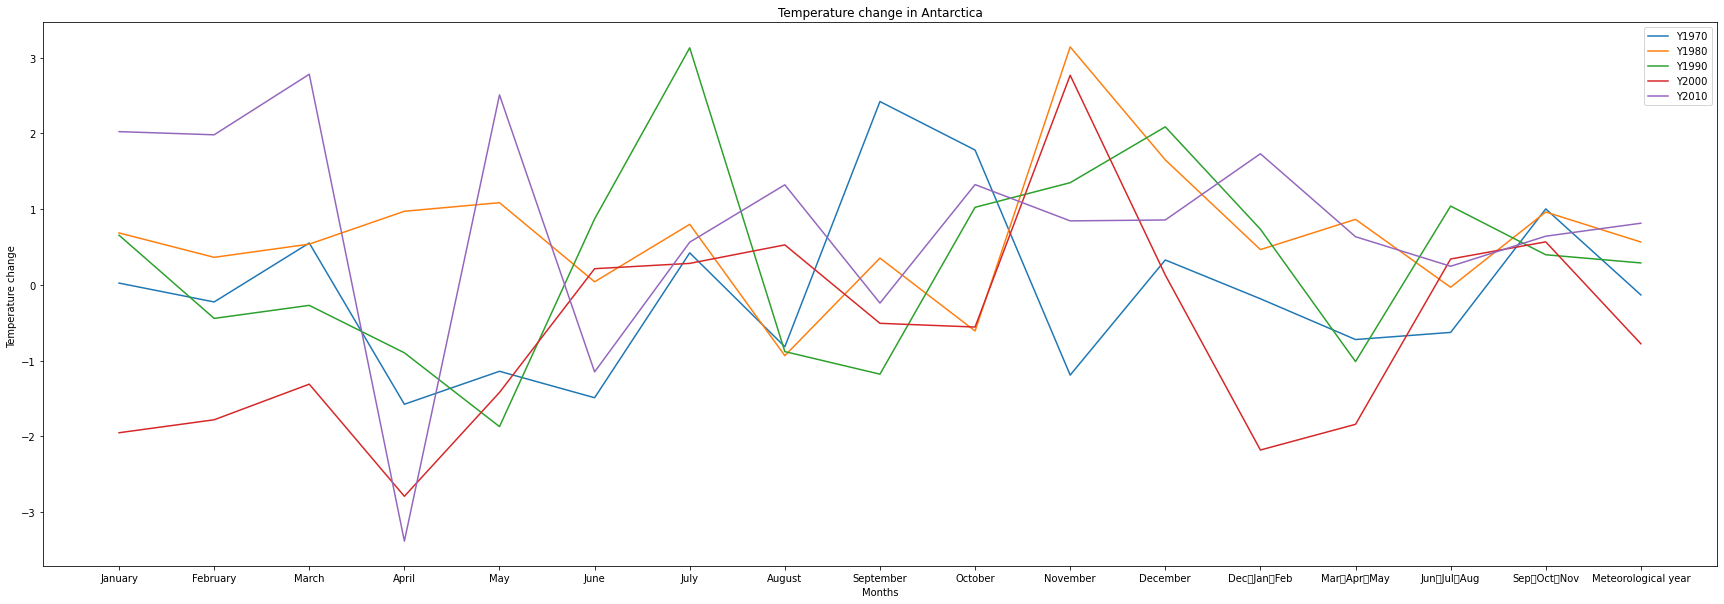

In [5]:
Antarctica_df.head()

plt.figure(figsize =(30,10))
plt.subplot(111)
sns.lineplot(x=Antarctica_df.Months.loc[Antarctica_df.Element=="Temperature change"],y=Antarctica_df.Y1970.loc[Antarctica_df.Element=='Temperature change'],label = "Y1970")
sns.lineplot(x=Antarctica_df.Months.loc[Antarctica_df.Element=="Temperature change"],y=Antarctica_df.Y1980.loc[Antarctica_df.Element=='Temperature change'],label = "Y1980")
sns.lineplot(x=Antarctica_df.Months.loc[Antarctica_df.Element=="Temperature change"],y=Antarctica_df.Y1990.loc[Antarctica_df.Element=='Temperature change'],label = "Y1990")
sns.lineplot(x=Antarctica_df.Months.loc[Antarctica_df.Element=="Temperature change"],y=Antarctica_df.Y2000.loc[Antarctica_df.Element=='Temperature change'],label = "Y2000")
sns.lineplot(x=Antarctica_df.Months.loc[Antarctica_df.Element=="Temperature change"],y=Antarctica_df.Y2010.loc[Antarctica_df.Element=='Temperature change'],label = "Y2010")
plt.xlabel("Months")
plt.ylabel("Temperature change ")
plt.title('Temperature change in Antarctica')
#plt.show()

In [6]:
Antarctica_df = Antarctica_df.melt(id_vars = ['Country','Months','Element'],var_name = 'Year',value_name ='temperature_change')
Antarctica_df['Year'] = Antarctica_df['Year'].str[1:].astype('str')
print(Antarctica_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2006 non-null   object 
 1   Months              2006 non-null   object 
 2   Element             2006 non-null   object 
 3   Year                2006 non-null   object 
 4   temperature_change  2006 non-null   float64
dtypes: float64(1), object(4)
memory usage: 78.5+ KB
None


C:\Users\poosh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\poosh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


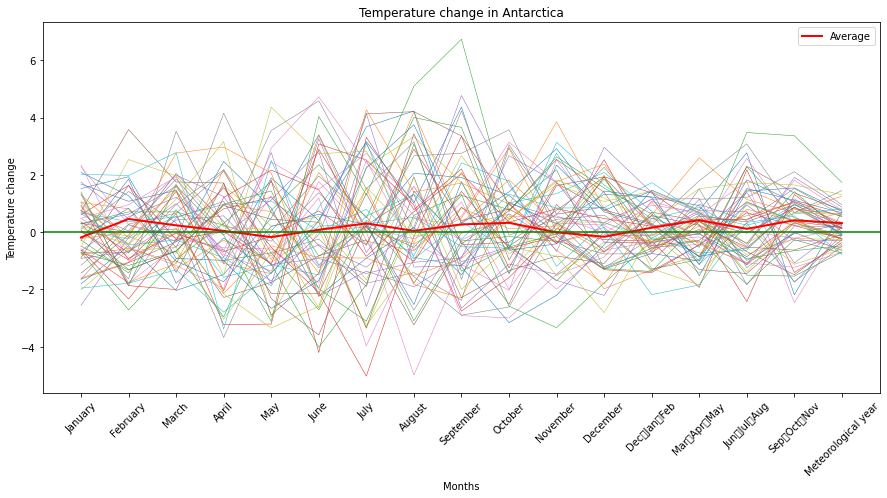

In [7]:
plt.figure(figsize= (15,15))
plt.subplot(211)
for i in Antarctica_df.Year.unique():
	plt.plot(Antarctica_df.Months.loc[Antarctica_df.Year==str(i)].loc[Antarctica_df.Element=='Temperature change'],Antarctica_df.temperature_change.loc[Antarctica_df.Year ==str(i)].loc[Antarctica_df.Element=='Temperature change'],linewidth = 0.5)
plt.plot(Antarctica_df.Months.unique(),Antarctica_df.loc[Antarctica_df.Element=='Temperature change'].groupby(['Months']).mean(),'r',linewidth=2.0,label = 'Average')
plt.xlabel('Months')
plt.xticks(rotation = 45)
plt.ylabel('Temperature change')
plt.axhline(y=0.0,color='g',linestyle = '-')
plt.title('Temperature change in Antarctica')
plt.legend()

Text(0.5, 1.0, 'Standard Deviation of temperature change in Antarctica (2010)')

C:\Users\poosh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\poosh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


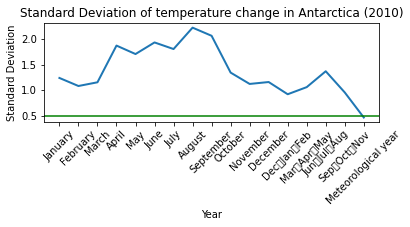

In [10]:
plt.subplot(212)
plt.plot(Antarctica_df.Months.loc[Antarctica_df.Year == '2010'].loc[Antarctica_df.Element=='Standard Deviation'],Antarctica_df.temperature_change.loc[Antarctica_df.Year=='2010'].loc[Antarctica_df.Element =='Standard Deviation'],linewidth=2.0)
plt.xlabel('Year')
plt.xticks(rotation = 45) 
plt.ylabel('Standard Deviation')
plt.axhline(y=0.5,color='g',linestyle = '-')
plt.subplots_adjust(hspace = 0.3)
plt.title('Standard Deviation of temperature change in Antarctica (2010)')

Text(0.5, 1.0, 'Temperature change in Antarctica')

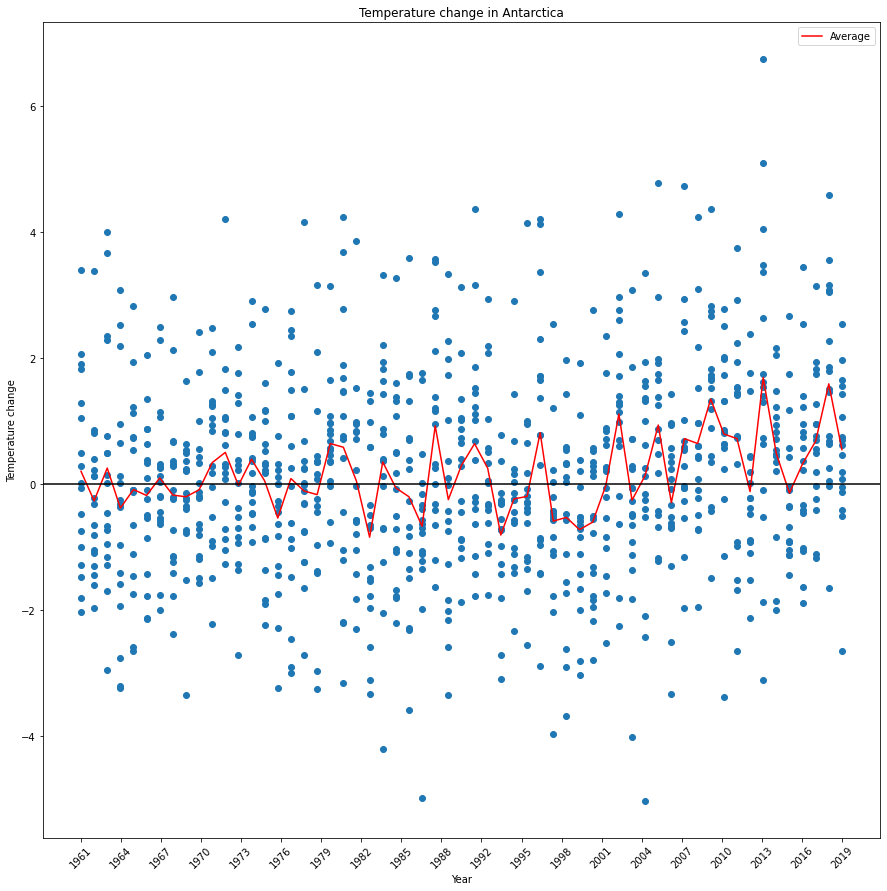

In [11]:
plt.figure(figsize = (15,15))
plt.scatter(Antarctica_df['Year'].loc[Antarctica_df.Element =='Temperature change'],Antarctica_df['temperature_change'].loc[Antarctica_df.Element=='Temperature change'])
plt.plot(Antarctica_df.loc[Antarctica_df.Element == 'Temperature change'].groupby(['Year']).mean(),'r',label = "Average")
plt.axhline(y=0.0,color = 'k',linestyle = '-')
plt.xlabel('Year')
plt.xticks(np.linspace(0,58,20),rotation=45)
plt.ylabel('Temperature change')
plt.legend()
plt.title('Temperature change in Antarctica')

Text(0.5, 1.0, 'Temperature change in Antarctica')

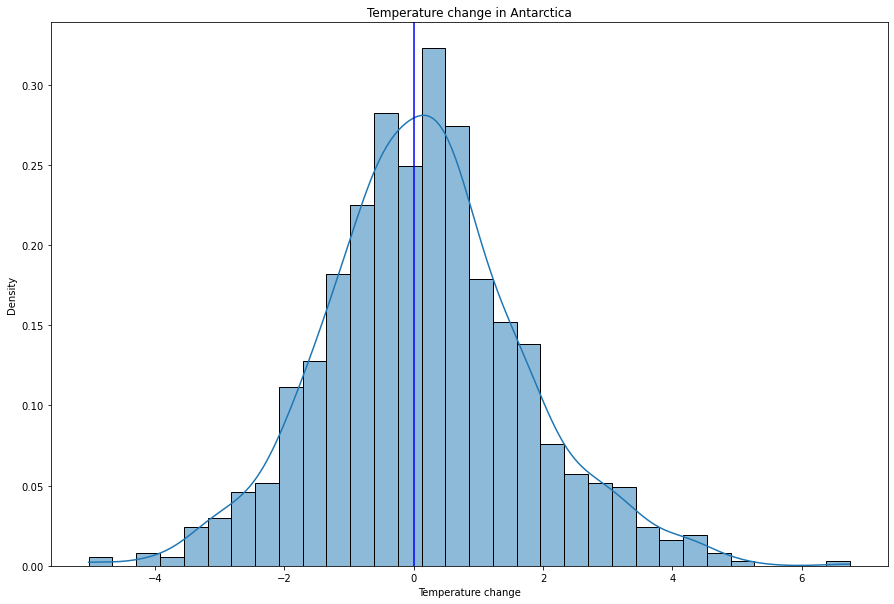

In [12]:
plt.figure(figsize = (15,10))
sns.histplot(Antarctica_df.temperature_change.loc[Antarctica_df.Element=='Temperature change'],kde = True,stat = 'density')
plt.axvline(x=0.0,color='b',linestyle = '-')
plt.xlabel('Temperature change')
plt.title('Temperature change in Antarctica')

In [13]:
regions=temperature_change[temperature_change.Country.isin(['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Annex I countries',
       'Non-Annex I countries', 'OECD'])]

temperature_change = temperature_change[~temperature_change.Country.isin(['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Annex I countries',
       'Non-Annex I countries', 'OECD'])]

(-5.0, 5.0)

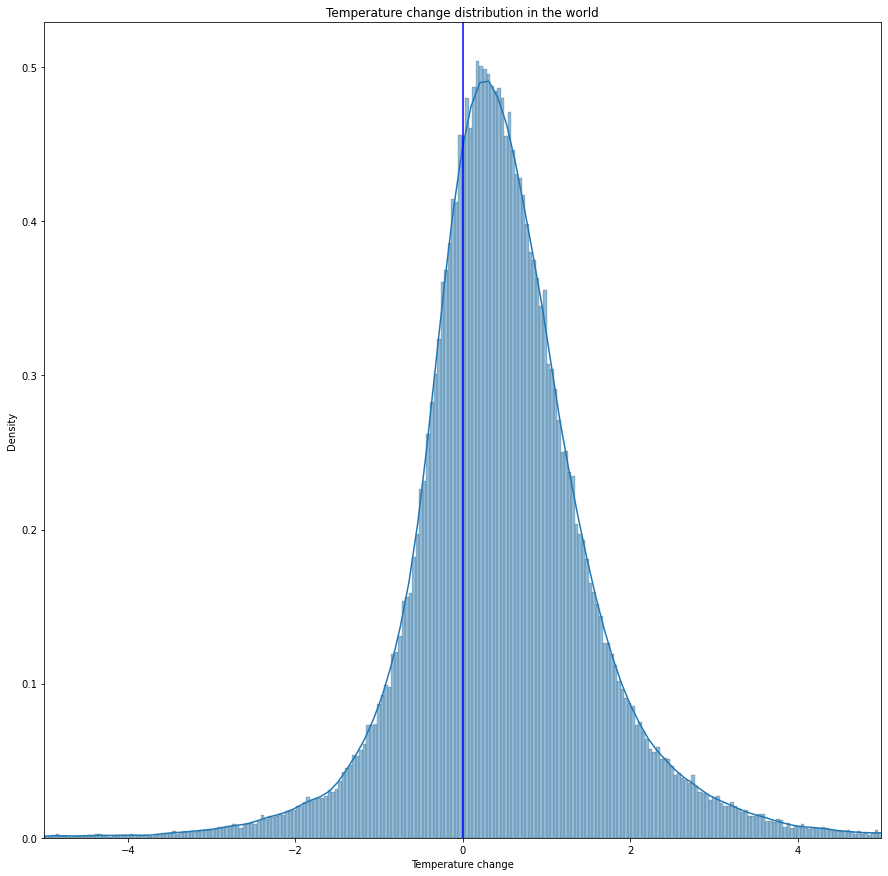

In [14]:
plt.figure(figsize = (15,15))
sns.histplot(temperature_change.temperature_change.loc[temperature_change.Element =='Temperature change'],kde = True,stat = 'density')
plt.axvline(x = 0.0,color = 'b',linestyle = '-')
plt.xlabel("Temperature change")
plt.title('Temperature change distribution in the world')
plt.xlim(-5,5)

In [15]:
average_temp = temperature_change.loc[temperature_change.Element == 'Temperature change'].groupby(['Year'],as_index = False).mean()
avg_temp_country = temperature_change.loc[temperature_change.Element=='Temperature change'].groupby(['Country','Year'],as_index = False).mean()

Text(0.5, 1.0, 'Temperature change across the world')

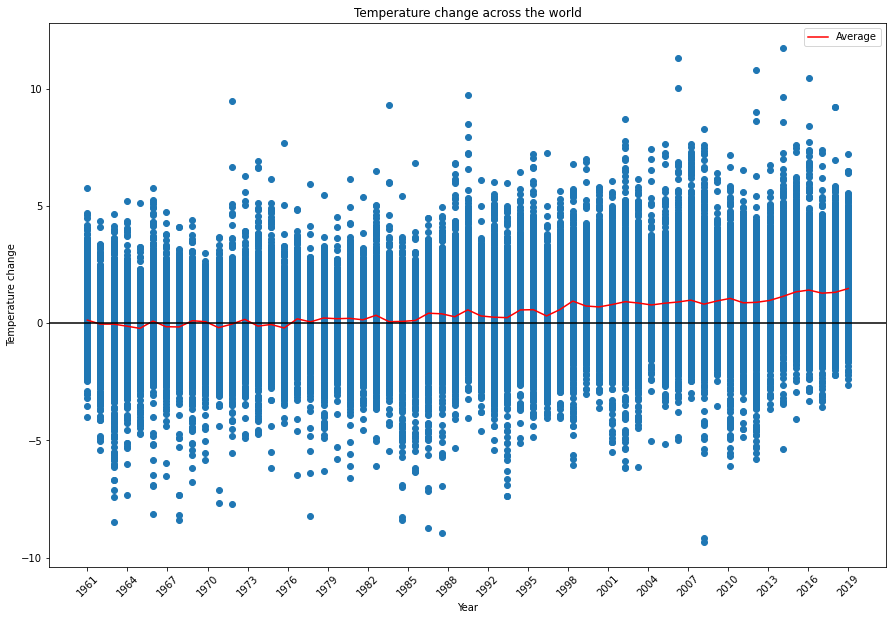

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(temperature_change["Year"].loc[temperature_change.Element=='Temperature change'],temperature_change['temperature_change'].loc[temperature_change.Element=='Temperature change'])
plt.plot(average_temp.Year,average_temp.temperature_change,'r',label = 'Average')
plt.axhline(y=0.0,color = 'k',linestyle = '-')
plt.xlabel('Year')
plt.xticks(np.linspace(0,58,20),rotation =45)
plt.ylabel('Temperature change')
plt.legend()
plt.title('Temperature change across the world')

Text(0.5, 1.0, 'Average temperature change of the world')

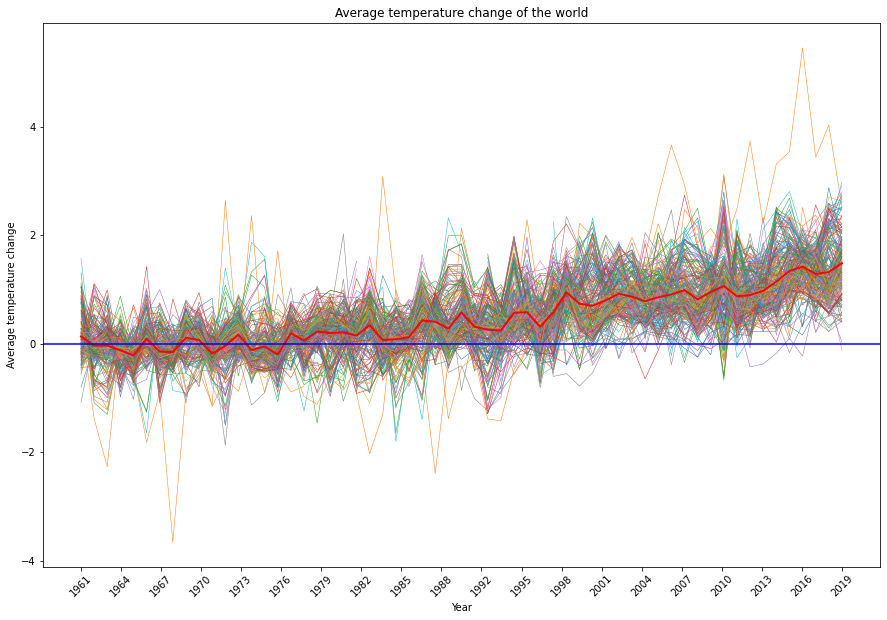

In [17]:
plt.figure(figsize = (15,10))
for i in avg_temp_country.Country.unique():
	plt.plot(avg_temp_country.Year.loc[avg_temp_country.Country == str(i)],avg_temp_country.temperature_change.loc[avg_temp_country.Country == str(i)],linewidth = 0.5 )
plt.plot(average_temp.Year,average_temp.temperature_change,'r',linewidth = 2.0)
plt.axhline(y = 0.0,color = 'b',linestyle ='-')
plt.xlabel('Year')
plt.xticks(np.linspace(0,58,20),rotation =45)
plt.ylabel('Average temperature change')
plt.title('Average temperature change of the world')

In [19]:
Month_v = {'January':'1', 'February':'2', 'March':'3', 'April':'4', 'May':'5', 'June':'6', 'July':'7','August':'8', 'September':'9', 'October':'10', 'November':'11', 'December':'12'}
temperature_change = temperature_change.replace(Month_v)

Austria_df = gb.get_group('Austria')
#Austria_df = Astria_df.melt(id_vars = ['Country','Months','Element'],var_name = 'Year',value_name ='temperature_change')
#Austria_df['Year'] = Astria_df['Year'].str[1:].astype(np.float64)

df.drop(Austria_df.index,axis=0)

,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,OECD,JunJulAug,Standard Deviation,0.247,0.247,0.247,0.247,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,OECD,SepOctNov,Temperature change,0.036,0.461,0.665,-0.157,-0.203,-0.295,0.321,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,OECD,SepOctNov,Standard Deviation,0.378,0.378,0.378,0.378,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,OECD,Meteorological year,Temperature change,0.165,-0.009,0.134,-0.190,-0.385,-0.166,-0.090,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


RMSE: 0.9721743424324878


Text(0, 0.5, 'Actual Value - Predicted value')

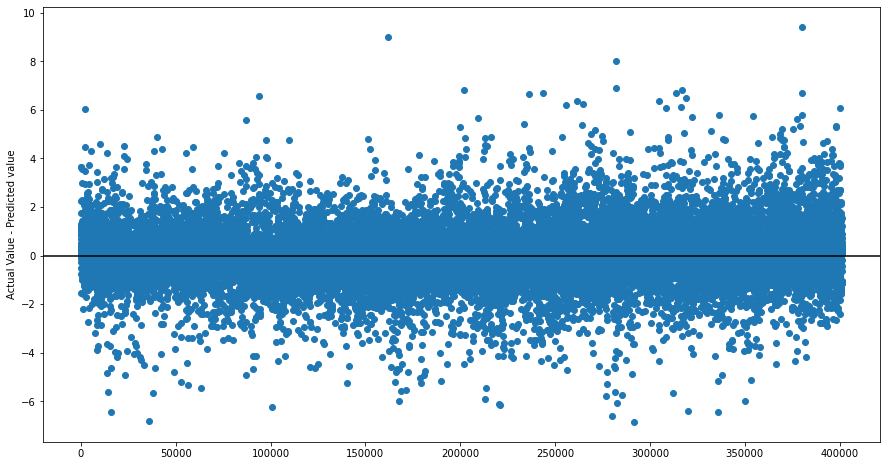

In [22]:
y= temperature_change['temperature_change'].loc[temperature_change.Element=='Temperature change']

X = temperature_change.drop(columns =['temperature_change','Country','Months','Element']).loc[temperature_change.Element=="Temperature change"]

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,random_state=42)


LR = LinearRegression()
LR.fit(X_train,y_train)
LRpreds = LR.predict(X_valid)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, LRpreds)))
plt.figure(figsize = (15,8))
plt.plot(y_valid-LRpreds,'o')
plt.axhline(y=0.0,color='k',linestyle = '-' )
plt.ylabel('Actual Value - Predicted value')


In [24]:
LR.fit(X,y)
LR_test = pd.DataFrame({'Year':np.random.randint(1980,2060,size =1000)})
LR.test = LR_test.sort_values(by=['Year']).reset_index(drop = True).astype(str)

preds_test = LR.predict(LR_test)
LR_test['temperature_change'] = pd.Series(preds_test,index = LR_test.index)

PR2_mod = Pipeline([('poly',PolynomialFeatures(degree=2)),('linear',LinearRegression(fit_intercept = False))])

PR3_mod = Pipeline([('poly',PolynomialFeatures(degree=5)),('linear',LinearRegression(fit_intercept = False))])

PR2_mod.fit(X,y)
PR3_mod.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression(fit_intercept=False))])

In [26]:
PR2_test = pd.DataFrame({'Year':np.random.randint(1980,2060,size =1000)})
PR2_test = PR2_test.sort_values(by=['Year']).reset_index(drop=True).astype(str)

PR3_test = pd.DataFrame({'Year':np.random.randint(1980,2060,size = 1000)})
PR3_test = PR3_test.sort_values(by = ['Year']).reset_index(drop = True).astype(str)

pred2_test = PR2_mod.predict(PR2_test)
pred3_test = PR3_mod.predict(PR3_test)

PR2_test['temperature_change'] = pd.Series(pred2_test,index = PR2_test.index)

PR3_test['temperature_change'] = pd.Series(pred3_test,index = PR2_test.index)

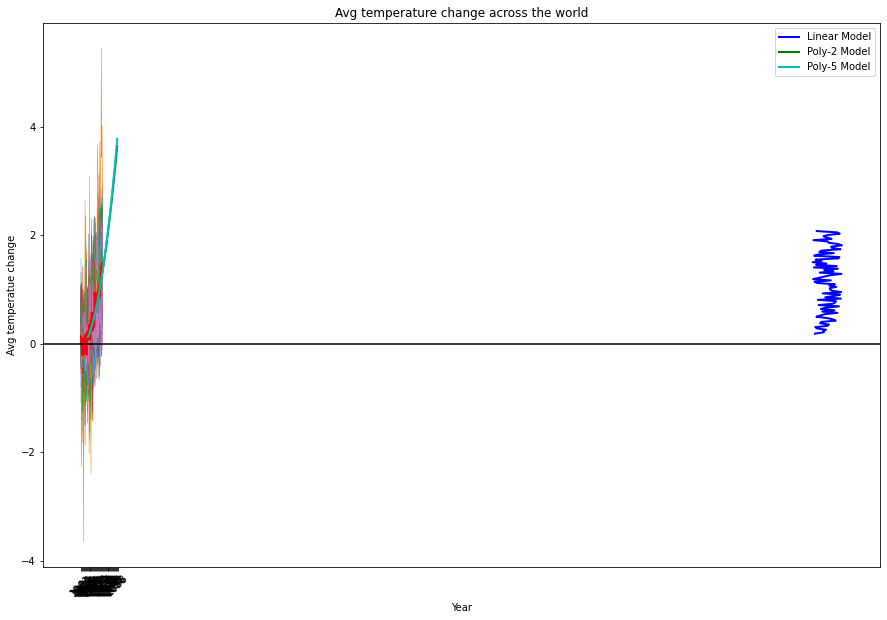

In [27]:
plt.figure(figsize = (15,10))
for i in avg_temp_country.Country.unique():
	plt.plot(avg_temp_country.Year.loc[avg_temp_country.Country == str(i)],avg_temp_country.temperature_change.loc[avg_temp_country.Country==str(i)],linewidth = 0.5)
plt.plot(average_temp.Year,average_temp.temperature_change,'r',linewidth = 2.0)
plt.plot(LR_test.Year.unique(),LR_test.groupby('Year').mean(),'b',linewidth = 2.0,label = 'Linear Model')
plt.plot(PR2_test.Year.unique(),PR2_test.groupby('Year').mean(),'g',linewidth=2.0,label = 'Poly-2 Model')
plt.plot(PR3_test.Year.unique(),PR3_test.groupby('Year').mean(),'c',linewidth=2.0,label = 'Poly-5 Model')
plt.axhline(y=0.0,color = 'k',linestyle = '-')
plt.xlabel('Year')
plt.xticks(np.linspace(0,100,40),rotation=45)

plt.ylabel('Avg temperatue change')
plt.title('Avg temperature change across the world')
plt.legend()